# Reddit Text Corpus Analysis: for News and Politics Data

#### Import all the libraries here

In [1]:
import nltk
from lxml import html  
import requests
from nltk.corpus import stopwords
from textblob import TextBlob
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import scikitplot as skplt
import re
from textblob import Word
from wordcloud import WordCloud, STOPWORDS 
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vaibhav.verdhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# wordnet is lexical batabse for Engligh
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vaibhav.verdhan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vaibhav.verdhan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
#In NLTK, chunking is the process of extracting short, well-formed phrases, or chunks, from a sentence. 

nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/vaibhav.verdhan/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [6]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     /Users/vaibhav.verdhan/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [188]:
news = pd.read_csv("news_politics.csv")

In [31]:
news.shape

(94086, 12)

In [32]:
news.head()

,Row,Text,ID,Subreddit,Meta,TimeStamp,UserName,UpVote,DownVote,LinkKarma,UserKarma,Gold
0,0,disclaimer i think obama should nominate some...,d028c5d,politics,news,1.455651e+09,degausse,3.0,0.0,1,1941,0.0
1,1,NaN,463sa9,politics,news,1.455647e+09,trash_reason,371.0,0.0,5613,1361,0.0
2,2,either way the process will be dragged out unt...,d026od6,politics,news,1.455648e+09,cyberspyder,5.0,0.0,1300,6462,1.0
3,3,republicans have always battled with severe ca...,d026wk3,politics,news,1.455649e+09,jabb0,15.0,0.0,44981,141501,0.0
4,4,politics were so different back then people on...,d02a3k3,politics,news,1.455653e+09,Hypertension123456,2.0,0.0,46,42036,0.0


In [189]:
# dropping the first ID column here
news = news.drop('Row', axis=1)

In [190]:
news.head()

,Text,ID,Subreddit,Meta,TimeStamp,UserName,UpVote,DownVote,LinkKarma,UserKarma,Gold
0,disclaimer i think obama should nominate some...,d028c5d,politics,news,1.455651e+09,degausse,3.0,0.0,1,1941,0.0
1,NaN,463sa9,politics,news,1.455647e+09,trash_reason,371.0,0.0,5613,1361,0.0
2,either way the process will be dragged out unt...,d026od6,politics,news,1.455648e+09,cyberspyder,5.0,0.0,1300,6462,1.0
3,republicans have always battled with severe ca...,d026wk3,politics,news,1.455649e+09,jabb0,15.0,0.0,44981,141501,0.0
4,politics were so different back then people on...,d02a3k3,politics,news,1.455653e+09,Hypertension123456,2.0,0.0,46,42036,0.0


In [191]:
# Dropping all the rows with Blank Text
news = news.dropna(subset=['Text'])

In [192]:
news.shape

(86852, 11)

In [193]:
news = news.drop_duplicates()

In [194]:
news.shape
# Finally we have 3599 rows to be analysed

(3599, 11)

In [55]:
news.head()

,Text,ID,Subreddit,Meta,TimeStamp,UserName,UpVote,DownVote,LinkKarma,UserKarma,Gold
0,disclaimer i think obama should nominate some...,d028c5d,politics,news,1.455651e+09,degausse,3.0,0.0,1,1941,0.0
2,either way the process will be dragged out unt...,d026od6,politics,news,1.455648e+09,cyberspyder,5.0,0.0,1300,6462,1.0
3,republicans have always battled with severe ca...,d026wk3,politics,news,1.455649e+09,jabb0,15.0,0.0,44981,141501,0.0
4,politics were so different back then people on...,d02a3k3,politics,news,1.455653e+09,Hypertension123456,2.0,0.0,46,42036,0.0
5,equally ridiculous here s a 1970 law review a...,d025wad,politics,news,1.455647e+09,trash_reason,26.0,0.0,5613,1361,0.0


## Prepare the date here

In [195]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

#### Convert all the news to Lower here

In [196]:
news.Text = news.Text.str.lower()

#### Let's clean the text here

In [197]:
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        # We are not using "text.split()" here
        #since it is not fool proof, e.g. words followed by punctuations "Are you kidding?I think you aren't."
        text = re.findall(r"[\w']+", text)
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)# remove links
    text = re.sub(r'\<a href', ' ', text)# remove html link tag
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

In [480]:
clean_text("It's indeed a great news!, may be you believe it? Right? Are you?")

'indeed great news may believe right'

In [199]:
# Cleaning our Text data here
news['Text'] = news['Text'].map(lambda text: clean_text(text))

In [19]:
news.Text.head()

0    disclaimer think obama nominate someone senate...
2    either way process dragged elections gop votes...
3    republicans always battled severe cases select...
4    politics different back people sides least pre...
5    equally ridiculous 1970 law review article mcc...
Name: Text, dtype: object

#### Count the number of occurances of words here 

In [20]:
def count_words(count_dict, text):
    for sentence in text:
        for word in sentence.split():
            if word not in count_dict:
                count_dict[word] = 1
            else:
                count_dict[word] += 1

In [21]:
mydict = {}
count_words(mydict, ["that is a great great great dog","you have a great dog"])
mydict

{'a': 2, 'dog': 2, 'great': 4, 'have': 1, 'is': 1, 'that': 1, 'you': 1}

##### These are the most comonly occuring words in our corpus. 

In [22]:
freq = pd.Series(' '.join(news.Text).split()).value_counts()[:50]

In [23]:
freq

nt            1129
e              819
would          601
people         601
sanders        571
r              555
hillary        554
bernie         543
n              540
like           486
clinton        416
obama          331
president      326
gt             315
think          313
trump          302
get            292
one            287
b              276
even           260
going          254
really         244
campaign       228
see            206
know           198
vote           185
support        184
party          183
want           181
government     175
black          173
could          172
political      170
http           168
much           166
article        166
say            165
well           161
also           160
many           160
make           157
said           156
time           155
us             151
money          151
right          151
big            149
women          146
years          145
bill           143
dtype: int64

#### Still more cleaning is reqiured, we have words with 1 length also coming, lets remove the words with less than 3 length

In [200]:
news.Text = news.Text.apply(lambda i: ' '.join(filter(lambda j: len(j) > 3, i.split())))

In [201]:
maxFreq = pd.Series(' '.join(news.Text).split()).value_counts()[:100]

In [202]:
maxFreq

people        601
would         601
sanders       571
hillary       554
bernie        543
like          486
clinton       416
obama         331
president     326
think         313
trump         302
even          260
going         254
really        244
campaign      228
know          198
vote          185
support       184
party         183
want          181
government    175
black         173
could         172
political     170
http          168
much          166
article       166
well          161
also          160
many          160
             ... 
point         101
white         101
things        100
last           99
pretty         98
saying         98
better         97
system         95
world          93
nevada         92
wants          92
media          91
voter          91
democratic     91
since          90
believe        89
banks          89
getting        89
real           88
another        87
insurance      85
thought        84
come           83
https          83
never     

##### Lets see which are the rare words

In [106]:
freq = pd.Series(' '.join(news.Text).split()).value_counts()[-10:]

In [107]:
freq

hastert        1
doublespeak    1
lend           1
hearts         1
laura          1
demagogues     1
gotcha         1
plummets       1
accounting     1
originality    1
dtype: int64

#### Doing Lemmatization

In [203]:
news.Text = news.Text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
news.Text.head()

0    disclaimer think obama nominate someone senate...
2    either process dragged election vote senate wo...
3    republican always battled severe case selectiv...
4    politics different back people side least pret...
5    equally ridiculous 1970 review article mcconne...
Name: Text, dtype: object

#### Generate a word cloud here

In [257]:
def generate_wordcloud(text): 
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of'} 
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [29]:
wordCloudStringData = news.iloc[1,0]
wordCloudStringData

'either process dragged election vote senate would rather gamble 2016 least decency inform everyone exactly time around'

In [30]:
# append to this string 
for i in range(2,len(news)):
    wordCloudStringData = wordCloudStringData + news.iloc[i,0]

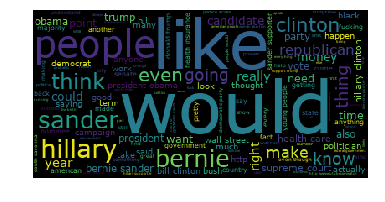

In [31]:
generate_wordcloud(wordCloudStringData)
#### would is coming 

## Topic Modelling

In [461]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [462]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [463]:
# Import Dataset
df = news.Text.to_frame()
df.head()

,Text
0,disclaimer think obama nominate someone senate...
2,either process dragged election vote senate wo...
3,republican always battled severe case selectiv...
4,politics different back people side least pret...
5,equally ridiculous 1970 review article mcconne...


In [464]:
type(df)

pandas.core.frame.DataFrame

In [465]:
# Convert to list
data = df.values.tolist()

pprint(data[:1])

[['disclaimer think obama nominate someone senate hold confirmation hearing '
  'article accurately describe republican statement issue vast majority '
  'republican statement although notably cruz cited article carefully phrase '
  'issue whether nominee nominated confirmed president last year office '
  'although kennedy confirmed 1988 nominated reagan 1987 fall definition']]


In [466]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['disclaimer', 'think', 'obama', 'nominate', 'someone', 'senate', 'hold', 'confirmation', 'hearing', 'article', 'accurately', 'describe', 'republican', 'statement', 'issue', 'vast', 'majority', 'republican', 'statement', 'although', 'notably', 'cruz', 'cited', 'article', 'carefully', 'phrase', 'issue', 'whether', 'nominee', 'nominated', 'confirmed', 'president', 'last', 'year', 'office', 'although', 'kennedy', 'confirmed', 'nominated', 'reagan', 'fall', 'definition']]


In [467]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['either', 'process', 'dragged', 'election', 'vote', 'senate', 'would', 'rather', 'gamble', 'least', 'decency', 'inform', 'everyone', 'exactly', 'time', 'around']


In [468]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [469]:

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['disclaimer', 'think', 'obama', 'nominate', 'someone', 'senate', 'hold', 'confirmation', 'hearing', 'article', 'accurately', 'describe', 'republican', 'statement', 'issue', 'vast', 'majority', 'republican', 'statement', 'notably', 'cruz', 'cite', 'article', 'carefully', 'phrase', 'issue', 'nominee', 'nominate', 'confirm', 'president', 'last', 'year', 'office', 'kennedy', 'confirm', 'nominate', 'reagan', 'fall', 'definition']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

In [470]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [471]:
# Print the Keyword in the 20 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.070*"come" + 0.042*"feel" + 0.041*"bill" + 0.027*"email" + '
  '0.027*"current" + 0.023*"base" + 0.021*"hell" + 0.018*"miss" + '
  '0.018*"still" + 0.017*"industry"'),
 (1,
  '0.117*"clinton" + 0.107*"campaign" + 0.061*"candidate" + 0.047*"political" '
  '+ 0.035*"bush" + 0.028*"america" + 0.027*"much" + 0.023*"close" + '
  '0.022*"american" + 0.021*"show"'),
 (2,
  '0.107*"say" + 0.084*"vote" + 0.083*"make" + 0.043*"party" + 0.034*"justice" '
  '+ 0.029*"thing" + 0.026*"hear" + 0.026*"scalia" + 0.023*"insurance" + '
  '0.021*"leave"'),
 (3,
  '0.141*"woman" + 0.059*"well" + 0.044*"may" + 0.040*"plan" + 0.037*"post" + '
  '0.037*"white" + 0.035*"nonhispanic" + 0.017*"course" + 0.015*"trust" + '
  '0.013*"running"'),
 (4,
  '0.054*"abortion" + 0.030*"would" + 0.026*"fact" + 0.022*"week" + '
  '0.021*"racism" + 0.021*"name" + 0.021*"play" + 0.020*"argument" + '
  '0.018*"hour" + 0.018*"rather"'),
 (5,
  '0.036*"change" + 0.036*"love" + 0.035*"tell" + 0.032*"reason" + '
  '0.031

In [472]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

## Coherence can be used to find the most optimum number of topics


Perplexity:  -7.65260790673157

Coherence Score:  0.4234693187328209


In [473]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
7      13.874097        1       1 -0.320928 -0.061614
11     10.720254        1       2 -0.105069  0.041894
18      6.443686        1       3 -0.167946  0.139857
2       5.517880        1       4  0.114792  0.028435
19      5.366857        1       5  0.034380  0.174097
5       5.360128        1       6 -0.124426  0.004781
1       5.359236        1       7 -0.054906 -0.170710
14      5.199317        1       8  0.010053 -0.100582
17      5.151007        1       9  0.077287  0.088819
10      4.661750        1      10  0.100968 -0.234608
4       3.887136        1      11 -0.093569  0.042107
0       3.661806        1      12  0.046348  0.082032
13      3.543770        1      13  0.102442 -0.021404
9       3.500549        1      14  0.021692 -0.182120
8       3.436013        1      15  0.013530 -0.027968
12      3.158005        1      16  0.134122  0.089407
3       2.886248        1      17  0.092922  0.074120
16      2.864946        1      18  0.077179 -0.093711
15      2.823192        1      19 -0.016006  0.059191
6       2.584122        1      20  0.057136  0.067977, topic_info=     Category        Freq                 Term       Total  loglift  logprob
term                                                                        
500   Default  543.000000               sander  543.000000  30.0000  30.0000
256   Default  522.000000               bernie  522.000000  29.0000  29.0000
56    Default  588.000000               people  588.000000  28.0000  28.0000
100   Default  388.000000              hillary  388.000000  27.0000  27.0000
736   Default  347.000000              clinton  347.000000  26.0000  26.0000
215   Default  359.000000                  say  359.000000  25.0000  25.0000
199   Default  316.000000             campaign  316.000000  24.0000  24.0000
45    Default  577.000000                would  577.000000  23.0000  23.0000
29    Default  438.000000                think  438.000000  22.0000  22.0000
133   Default  225.000000                woman  225.000000  21.0000  21.0000
44    Default  296.000000                 vote  296.000000  20.0000  20.0000
230   Default  280.000000                 even  280.000000  19.0000  19.0000
194   Default  260.000000                 make  260.000000  18.0000  18.0000
23    Default  362.000000            president  362.000000  17.0000  17.0000
185   Default  255.000000              support  255.000000  16.0000  16.0000
512   Default  228.000000                black  228.000000  15.0000  15.0000
131   Default  294.000000                 want  294.000000  14.0000  14.0000
54    Default  225.000000                 http  225.000000  13.0000  13.0000
408   Default  233.000000               really  233.000000  12.0000  12.0000
241   Default  269.000000                trump  269.000000  11.0000  11.0000
20    Default  288.000000                obama  288.000000  10.0000  10.0000
136   Default  165.000000           government  165.000000   9.0000   9.0000
197   Default  201.000000                thing  201.000000   8.0000   8.0000
31    Default  271.000000                 year  271.000000   7.0000   7.0000
321   Default  204.000000            candidate  204.000000   6.0000   6.0000
378   Default  153.000000                voter  153.000000   5.0000   5.0000
172   Default  233.000000                 good  233.000000   4.0000   4.0000
153   Default  255.000000                 know  255.000000   3.0000   3.0000
567   Default  168.000000                state  168.000000   2.0000   2.0000
1     Default  212.000000              article  212.000000   1.0000   1.0000
...       ...         ...                  ...         ...      ...      ...
155   Topic20   73.355797                never   74.118973   3.6454  -2.9689
1068  Topic20   68.083206                power   68.846382   3.6446  -3.0435
1063  Topic20   52.190907                 live   52.954082   3.6413  -3.30

#### Let's do some Sentiment Analysis too

In [449]:
sentimentScoresOnly = news.Text.apply(lambda x: TextBlob(x).sentiment[0])
sentimentScores = news.Text.apply(lambda x: TextBlob(x).sentiment)

In [ ]:
sentimentScores.head()

In [450]:
sentimentScores.to_csv('ReviewsSentiment.csv')

In [451]:
## get the respective counts for all the reviews
# if the polarity is above 0.75 Extremely Positive
# if the polarity is between 0.5-0.74 Very Positive
# if the polarity is between 0.2-0.5 Positive
# if the polarity is between -0.2 to 0.2 Neutral
# if the polarity is between -0.2 to -0.5 Negative
# if the polarity is between -0.5 to -0.74 Very Negative
# if the polarity is less than -0.75 Extremely Negative

In [452]:
allReviewsSentimentDF = sentimentScoresOnly.to_frame()

In [453]:
allReviewsSentimentDF.head()

,Text
0,0.228571
2,-0.025000
3,0.000000
4,-0.025000
5,-0.333333


In [455]:
# Create a list to store the data
grades = []

# For each row in the column,
for row in allReviewsSentimentDF['Text']:
    # if more than a value,
    if row >= 0.75:
       grades.append('Extremely Positive')
    elif (row >= 0.5) & (row < 0.75):
        grades.append('Very Positive')
    elif (row >= 0.2) & (row < 0.5):
        grades.append('Positive')
    elif (row >= -0.2) & (row < 0.2):
        grades.append('Neutral')
    elif (row > -0.5) & (row <= -0.2):
        grades.append('Negative')
    elif (row >= -0.75) & (row < -0.5):
        grades.append('Very Negative')
    elif  row < -0.75:
        grades.append('Extremely Dis-Negative')
    else:
        # Append a failing grade
        grades.append('No Sentiment')


In [457]:
# Create a column from the list
allReviewsSentimentDF['SentimentScore'] = grades

In [458]:
allReviewsSentimentDF.head()

,Text,SentimentScore
0,0.228571,Positive
2,-0.025000,Neutral
3,0.000000,Neutral
4,-0.025000,Neutral
5,-0.333333,Negative


In [459]:
allReviewsSentimentDF.SentimentScore.value_counts()

Neutral                   2363
Positive                   612
Negative                   272
Very Positive              188
Extremely Positive          64
Very Negative               35
No Sentiment                34
Extremely Dis-Negative      31
Name: SentimentScore, dtype: int64

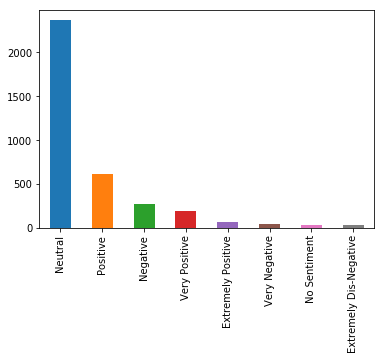

In [460]:
allReviewsSentimentDF['SentimentScore'].value_counts().plot(kind='bar')

# Named Entity Recognition

In [423]:
news.iloc[161,0]

'judging picture worry getting woody definitely twobagger'

#### The process starts here
We tried Spcy, NLTK and StanfordNLP.

In [482]:
## Using Spacy
doc = nlp('''actually  we had elections in 2010  2012 and 2014  They RESULTED in the currently republican held senate  who has to confirm anyone John might nominate ''')
print([(X.text, X.label_) for X in doc.ents])

[]


In [174]:
## Using NLTK 

In [415]:
doc = '''actually  we had elections in 2010  2012 and 2014  They London in the currently republican held senate  who has to confirm anyone Obama might nominate '''
doc = 'curing polio did nt end racismsexism it was still a good idea '
doc = doc.title()
# tokenize doc
tokenized_doc = nltk.word_tokenize(doc)

# tag sentences and use nltk's Named Entity Chunker
tagged_sentences = nltk.pos_tag(tokenized_doc)
ne_chunked_sents = nltk.ne_chunk(tagged_sentences)

# extract all named entities
named_entities = []
for tagged_tree in ne_chunked_sents:
    if hasattr(tagged_tree, 'label'):
        entity_name = ' '.join(c[0] for c in tagged_tree.leaves()) #
        entity_type = tagged_tree.label() # get NE category
        named_entities.append((entity_name, entity_type))
print(named_entities)

[('Polio Did Nt End', 'PERSON')]


In [263]:
for i in range(2,len(news)):
    doc = news.iloc[i,0]
    # tokenize doc
    tokenized_doc = nltk.word_tokenize(doc)

    # tag sentences and use nltk's Named Entity Chunker
    tagged_sentences = nltk.pos_tag(tokenized_doc)
    ne_chunked_sents = nltk.ne_chunk(tagged_sentences)

    # extract all named entities
    named_entities = []
    for tagged_tree in ne_chunked_sents:
        if hasattr(tagged_tree, 'label'):
            entity_name = ' '.join(c[0] for c in tagged_tree.leaves()) #
            entity_type = tagged_tree.label() # get NE category
            named_entities.append((entity_name, entity_type))
    #print(named_entities)

#### Using Stanford Named Entity Recognizer here

In [264]:
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.tag import StanfordNERTagger
from itertools import groupby

In [408]:
text = 'curing polio did nt end racismsexism John it was still a good idea '
#text = text.title()
#text

In [409]:
sentences = sent_tokenize(text)
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

In [410]:
sn_3class = StanfordNERTagger('/Users/vaibhav.verdhan/Documents/Self/Start/Reddit/stanford-ner-2018-10-16/classifiers/english.all.3class.distsim.crf.ser.gz',
                       path_to_jar='/Users/vaibhav.verdhan/Documents/Self/Start/Reddit/stanford-ner-2018-10-16/stanford-ner.jar')

In [411]:
ne_annot_sent_3c = [sn_3class.tag(sent) for sent in tokenized_sentences]

In [476]:
persons_sn_3class = []
for annot_sent in ne_annot_sent_3c:
    for annot_token in annot_sent:
        if annot_token[1] == 'PERSON':
            persons_sn_3class.append(annot_token[0])
print("Persons' names found:", persons_sn_3class)

Persons' names found: ['John']


In [303]:
sn_4class = StanfordNERTagger('/Users/vaibhav.verdhan/Documents/Self/Start/Reddit/stanford-ner-2018-10-16/classifiers/english.conll.4class.distsim.crf.ser.gz',
                       path_to_jar='/Users/vaibhav.verdhan/Documents/Self/Start/Reddit/stanford-ner-2018-10-16/stanford-ner.jar')

In [304]:
ne_annot_sent_4c = [sn_4class.tag(sent) for sent in tokenized_sentences]

In [305]:
persons_sn_4class = []
for annot_sent in ne_annot_sent_4c:
#     print (annot_sent)
    for annot_token in annot_sent:
        if annot_token[1] == 'PERSON':
            persons_sn_4class.append(annot_token[0])
print("Persons' names found:", persons_sn_4class)

Persons' names found: ['Obama']


In [481]:
def get_individuals(ne_annot_sent):
    individuals = []
    for annot_sent in ne_annot_sent:
        #print(annot_sent)
        for tag, chunk in groupby(annot_sent, lambda x:x[1]):
            if (tag == "PERSON"):
                individuals.append(" ".join(w for w, t in chunk))                
    return individuals

In [307]:
print(persons_sn_3class, '\n\n', get_individuals(ne_annot_sent_3c))

['Obama'] 

 ['Obama']


In [308]:
print(persons_sn_4class, '\n\n', get_individuals(ne_annot_sent_4c))

['Obama'] 

 ['Obama']


In [233]:
import spacy 
from spacy.lang.en.examples import sentences
nlp = spacy.load('en')
import en_core_web_sm

In [352]:
text = 'CLASSY PRESIDENT NORMALLY RESERVED GIVING OPINION UPCOMING GENERAL ELECTION'
document = nlp(text)

In [353]:
document

CLASSY PRESIDENT NORMALLY RESERVED GIVING OPINION UPCOMING GENERAL ELECTION JOHN

In [354]:
list(document.sents)

[CLASSY PRESIDENT NORMALLY RESERVED GIVING OPINION,
 UPCOMING GENERAL ELECTION JOHN]

In [355]:
entities = [e.string for e in document.ents if 'PERSON'==e.label_] 
entities = list(entities) 
print (entities)

[]


In [ ]:
#### Convert the entire text to uppercase

In [314]:
news.Text.head()

0    DISCLAIMER THINK OBAMA NOMINATE SOMEONE SENATE...
2    EITHER PROCESS DRAGGED ELECTION VOTE SENATE WO...
3    REPUBLICAN ALWAYS BATTLED SEVERE CASE SELECTIV...
4    POLITICS DIFFERENT BACK PEOPLE SIDE LEAST PRET...
5    EQUALLY RIDICULOUS 1970 REVIEW ARTICLE MCCONNE...
Name: Text, dtype: object

In [315]:
document = nlp(news.iloc[11,0])
document

CLASSY PRESIDENT NORMALLY RESERVED GIVING OPINION UPCOMING GENERAL ELECTION

In [269]:
news.iloc[11,0]

'CLASSY PRESIDENT NORMALLY RESERVED GIVING OPINION UPCOMING GENERAL ELECTION'

In [477]:
#### Lets classify the words instead
data = {
  'Names': ['john','jay','dan','nathan','bob', 'obama', 'hillary'],
  'Offices': ['president', 'secretary','senator'],
  'Places': ['tokyo','bejing','washington','new york','florida','mumbai'],
}
# Words -> category
categories = {word: key for key, words in data.items() for word in words}

# Load the whole embedding matrix
embeddings_index = {}
with open('/Users/vaibhav.verdhan/Documents/Self/Start/Reddit/glove/glove.6B.100d.txt') as f:
  for line in f:
    values = line.split()
    word = values[0]
    embed = np.array(values[1:], dtype=np.float32)
    embeddings_index[word] = embed
print('Loaded %s word vectors.' % len(embeddings_index))
# Embeddings for available words
data_embeddings = {key: value for key, value in embeddings_index.items() if key in categories.keys()}
# Testing


Loaded 400000 word vectors.


In [478]:
# Processing the query
def process(query):
  query_embed = embeddings_index[query]
  scores = {}
  for word, embed in data_embeddings.items():
    category = categories[word]
    dist = query_embed.dot(embed)
    dist /= len(data[category])
    scores[category] = scores.get(category, 0) + dist
  return scores

In [485]:
print(process('paris'))

{'Offices': 9.94483208656311, 'Names': 6.383474281855992, 'Places': 9.216219986478489}


In [247]:
from nltk import word_tokenize, pos_tag, ne_chunk

In [248]:
NEROutput = []

for i in range(2,len(news)):
    nerOutput = (ne_chunk(pos_tag(word_tokenize(news.iloc[i,0]))))
    #print(nerOutput.label)
    #print(nerOutput.subtrees)
    #print(nerOutput.leaves())
    #NPs = ([word for word,pos in nerOutput.leaves() if pos=='NNP'])
    NPs = ([word for word,pos in nerOutput.leaves() if pos=='NN'])
    if(len(NPs) > 0):
        NEROutput.append(NPs)

In [259]:
#NEROutput

In [250]:
type(NEROutput)

list

In [251]:
NERDF = pd.DataFrame(NEROutput)

In [252]:
NERDF.shape

(3451, 411)

In [253]:
NERDF.head()

,0,1,2,3,4,5,6,7,8,9,...,401,402,403,404,405,406,407,408,409,410
0,case,amnesia,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,http,wwwnytimescom19871112usreagannominatesanthonyk...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,review,article,mcconnell,dominion,court,nomination,process,http,imgurcompbeveod,None,...,None,None,None,None,None,None,None,None,None,None
3,somehow,thought,place,striker,meaning,cross,picket,line,choice,date,...,None,None,None,None,None,None,None,None,None,None
4,government,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [254]:
NERDF[0].value_counts()

bernie             110
clinton             87
sander              77
trump               58
thing               55
article             49
president           45
bill                43
someone             38
obama               35
year                33
anyone              32
government          29
election            26
medium              26
party               26
democrat            25
voter               25
vote                24
revolution          24
need                24
http                23
point               23
woman               22
time                21
secretary           20
course              20
economist           20
comment             19
carson              19
                  ... 
stop                 1
purpose              1
textualism           1
branch               1
folk                 1
welp                 1
deficit              1
voice                1
quality              1
shot                 1
louie                1
exit                 1
ticket     

# Let's do the Topic Modelling Now

In [215]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [221]:
# Import Dataset
#df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
df = news.Text.to_frame()
#print(df.target_names.unique())
df.head()

,Text
0,disclaimer think obama nominate someone senate...
2,either process dragged election vote senate wo...
3,republican always battled severe case selectiv...
4,politics different back people side least pret...
5,equally ridiculous 1970 review article mcconne...


In [222]:
type(news.Text)

pandas.core.series.Series

In [226]:
# Convert to list
data = df.values.tolist()

# Remove Emails
#data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
#data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
#data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

[['disclaimer think obama nominate someone senate hold confirmation hearing '
  'article accurately describe republican statement issue vast majority '
  'republican statement although notably cruz cited article carefully phrase '
  'issue whether nominee nominated confirmed president last year office '
  'although kennedy confirmed 1988 nominated reagan 1987 fall definition']]


In [227]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['disclaimer', 'think', 'obama', 'nominate', 'someone', 'senate', 'hold', 'confirmation', 'hearing', 'article', 'accurately', 'describe', 'republican', 'statement', 'issue', 'vast', 'majority', 'republican', 'statement', 'although', 'notably', 'cruz', 'cited', 'article', 'carefully', 'phrase', 'issue', 'whether', 'nominee', 'nominated', 'confirmed', 'president', 'last', 'year', 'office', 'although', 'kennedy', 'confirmed', 'nominated', 'reagan', 'fall', 'definition']]


In [240]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['either', 'process', 'dragged', 'election', 'vote', 'senate', 'would', 'rather', 'gamble', 'least', 'decency', 'inform', 'everyone', 'exactly', 'time', 'around']


In [229]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [230]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['disclaimer', 'think', 'obama', 'nominate', 'someone', 'senate', 'hold', 'confirmation', 'hearing', 'article', 'accurately', 'describe', 'republican', 'statement', 'issue', 'vast', 'majority', 'republican', 'statement', 'notably', 'cruz', 'cite', 'article', 'carefully', 'phrase', 'issue', 'nominee', 'nominate', 'confirm', 'president', 'last', 'year', 'office', 'kennedy', 'confirm', 'nominate', 'reagan', 'fall', 'definition']]


In [231]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 3), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1)]]


In [232]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [233]:
# Print the Keyword in the 20 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.070*"come" + 0.042*"feel" + 0.041*"bill" + 0.027*"email" + '
  '0.027*"current" + 0.023*"base" + 0.021*"hell" + 0.018*"miss" + '
  '0.018*"still" + 0.017*"industry"'),
 (1,
  '0.117*"clinton" + 0.107*"campaign" + 0.061*"candidate" + 0.047*"political" '
  '+ 0.035*"bush" + 0.028*"america" + 0.027*"much" + 0.023*"close" + '
  '0.022*"american" + 0.021*"show"'),
 (2,
  '0.107*"say" + 0.084*"vote" + 0.083*"make" + 0.043*"party" + 0.034*"justice" '
  '+ 0.029*"thing" + 0.026*"hear" + 0.026*"scalia" + 0.023*"insurance" + '
  '0.021*"leave"'),
 (3,
  '0.141*"woman" + 0.059*"well" + 0.044*"may" + 0.040*"plan" + 0.037*"post" + '
  '0.037*"white" + 0.035*"nonhispanic" + 0.017*"course" + 0.015*"trust" + '
  '0.013*"running"'),
 (4,
  '0.054*"abortion" + 0.030*"would" + 0.026*"fact" + 0.022*"week" + '
  '0.021*"racism" + 0.021*"name" + 0.021*"play" + 0.020*"argument" + '
  '0.018*"hour" + 0.018*"rather"'),
 (5,
  '0.036*"change" + 0.036*"love" + 0.035*"tell" + 0.032*"reason" + '
  '0.031

In [234]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.65260790673157

Coherence Score:  0.4234693187328209


In [235]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
7      13.874097        1       1 -0.320928 -0.061614
11     10.720254        1       2 -0.105069  0.041894
18      6.443686        1       3 -0.167946  0.139857
2       5.517880        1       4  0.114792  0.028435
19      5.366857        1       5  0.034380  0.174097
5       5.360128        1       6 -0.124426  0.004781
1       5.359236        1       7 -0.054906 -0.170710
14      5.199317        1       8  0.010053 -0.100582
17      5.151007        1       9  0.077287  0.088819
10      4.661750        1      10  0.100968 -0.234608
4       3.887136        1      11 -0.093569  0.042107
0       3.661806        1      12  0.046348  0.082032
13      3.543770        1      13  0.102442 -0.021404
9       3.500549        1      14  0.021692 -0.182120
8       3.436013        1      15  0.013530 -0.027968
12      3.158005        1      16  0.134122  0.089407
3       2.886248        1      17  0.092922  0.074120
16      2.864946        1      18  0.077179 -0.093711
15      2.823192        1      19 -0.016006  0.059191
6       2.584122        1      20  0.057136  0.067977, topic_info=     Category        Freq                 Term       Total  loglift  logprob
term                                                                        
500   Default  543.000000               sander  543.000000  30.0000  30.0000
256   Default  522.000000               bernie  522.000000  29.0000  29.0000
56    Default  588.000000               people  588.000000  28.0000  28.0000
100   Default  388.000000              hillary  388.000000  27.0000  27.0000
736   Default  347.000000              clinton  347.000000  26.0000  26.0000
215   Default  359.000000                  say  359.000000  25.0000  25.0000
199   Default  316.000000             campaign  316.000000  24.0000  24.0000
45    Default  577.000000                would  577.000000  23.0000  23.0000
29    Default  438.000000                think  438.000000  22.0000  22.0000
133   Default  225.000000                woman  225.000000  21.0000  21.0000
44    Default  296.000000                 vote  296.000000  20.0000  20.0000
230   Default  280.000000                 even  280.000000  19.0000  19.0000
194   Default  260.000000                 make  260.000000  18.0000  18.0000
23    Default  362.000000            president  362.000000  17.0000  17.0000
185   Default  255.000000              support  255.000000  16.0000  16.0000
512   Default  228.000000                black  228.000000  15.0000  15.0000
131   Default  294.000000                 want  294.000000  14.0000  14.0000
54    Default  225.000000                 http  225.000000  13.0000  13.0000
408   Default  233.000000               really  233.000000  12.0000  12.0000
241   Default  269.000000                trump  269.000000  11.0000  11.0000
20    Default  288.000000                obama  288.000000  10.0000  10.0000
136   Default  165.000000           government  165.000000   9.0000   9.0000
197   Default  201.000000                thing  201.000000   8.0000   8.0000
31    Default  271.000000                 year  271.000000   7.0000   7.0000
321   Default  204.000000            candidate  204.000000   6.0000   6.0000
378   Default  153.000000                voter  153.000000   5.0000   5.0000
172   Default  233.000000                 good  233.000000   4.0000   4.0000
153   Default  255.000000                 know  255.000000   3.0000   3.0000
567   Default  168.000000                state  168.000000   2.0000   2.0000
1     Default  212.000000              article  212.000000   1.0000   1.0000
...       ...         ...                  ...         ...      ...      ...
155   Topic20   73.355797                never   74.118973   3.6454  -2.9689
1068  Topic20   68.083206                power   68.846382   3.6446  -3.0435
1063  Topic20   52.190907                 live   52.954082   3.6413  -3.30

In [ ]:
#### Another way to do the topic modelling

In [179]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [204]:
myTextDataList = news.Text.tolist()

In [205]:
doc_clean = [clean(doc).split() for doc in myTextDataList] 

In [206]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [209]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)

In [211]:
print(ldamodel.print_topics(num_topics=10, num_words=3))

[(0, '0.012*"people" + 0.011*"like" + 0.011*"would"'), (1, '0.022*"bernie" + 0.011*"hillary" + 0.011*"vote"'), (2, '0.015*"article" + 0.015*"health" + 0.012*"insurance"'), (3, '0.008*"really" + 0.008*"court" + 0.007*"majority"'), (4, '0.014*"like" + 0.008*"think" + 0.008*"bernie"'), (5, '0.020*"would" + 0.013*"trump" + 0.012*"bernie"'), (6, '0.015*"people" + 0.015*"would" + 0.011*"trump"'), (7, '0.029*"hillary" + 0.028*"sander" + 0.013*"like"'), (8, '0.016*"people" + 0.011*"want" + 0.009*"bernie"'), (9, '0.016*"black" + 0.011*"people" + 0.011*"sander"')]
